In [1]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D:\Dataset\Data\Train'
valid_path = 'D:\Dataset\Data\Test'


In [3]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [4]:
folders = glob('D:\Dataset\Data\Train\*')


In [5]:
folders

['D:\\Dataset\\Data\\Train\\Parasite', 'D:\\Dataset\\Data\\Train\\Uninfected']

In [6]:
x = Flatten()(mobilnet.output)


In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)


In [8]:
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [9]:
from tensorflow.keras.layers import MaxPooling2D


In [10]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:\Dataset\Data\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 416 images belonging to 2 classes.


In [14]:
training_set


In [15]:
test_set = test_datagen.flow_from_directory('D:\Dataset\Data\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
13/13 [==============================] - 27s 2s/step - loss: 0.9783 - accuracy: 0.5697 - val_loss: 0.8429 - val_accuracy: 0.3284
Epoch 2/20
13/13 [==============================] - 15s 1s/step - loss: 0.5066 - accuracy: 0.7452 - val_loss: 1.2291 - val_accuracy: 0.2910
Epoch 3/20
13/13 [==============================] - 14s 1s/step - loss: 0.4438 - accuracy: 0.7861 - val_loss: 0.9780 - val_accuracy: 0.3881
Epoch 4/20
13/13 [==============================] - 13s 1s/step - loss: 0.4105 - accuracy: 0.8101 - val_loss: 1.0420 - val_accuracy: 0.4403
Epoch 5/20
13/13 [==============================] - 13s 1s/step - loss: 0.3623 - accuracy: 0.8149 - val_loss: 0.7288 - val_accuracy: 0.5224
Epoch 6/20
13/13 [==============================] - 15s 1s/step - loss: 0.3447 - accuracy: 0.8630 - val_loss: 0.7273 - val_accuracy: 0.5896
Epoch 7/20
13/13 [==============================] - 16s 1s/step - loss: 0.3116 - acc

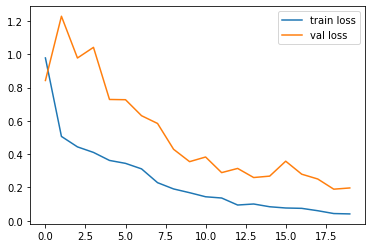

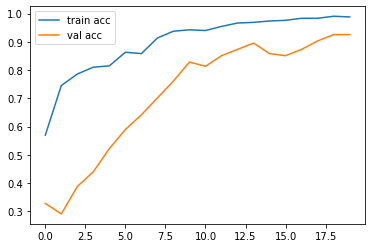

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [18]:

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')


In [19]:
y_pred = model.predict(test_set)
y_pred


array([[9.99746025e-01, 2.53938138e-04],
       [9.99970078e-01, 2.99634139e-05],
       [3.60939279e-02, 9.63906109e-01],
       [9.99962330e-01, 3.76949974e-05],
       [9.99450505e-01, 5.49448770e-04],
       [7.45325089e-02, 9.25467551e-01],
       [4.89467293e-01, 5.10532737e-01],
       [2.93856729e-02, 9.70614314e-01],
       [2.46530958e-02, 9.75346923e-01],
       [9.98252332e-01, 1.74764101e-03],
       [9.96789217e-01, 3.21081304e-03],
       [9.99999881e-01, 1.43481856e-07],
       [1.36457980e-01, 8.63542020e-01],
       [8.53858739e-02, 9.14614201e-01],
       [9.99998212e-01, 1.77261745e-06],
       [9.72050607e-01, 2.79494245e-02],
       [1.14033043e-01, 8.85966957e-01],
       [4.08999503e-01, 5.91000438e-01],
       [7.70561844e-02, 9.22943830e-01],
       [4.24537599e-01, 5.75462401e-01],
       [9.99996543e-01, 3.47246464e-06],
       [9.99945164e-01, 5.48573516e-05],
       [8.35090056e-02, 9.16490972e-01],
       [7.46320048e-03, 9.92536783e-01],
       [1.945686

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [21]:
model=load_model('model_vgg19.h5')


In [22]:
#img=image.load_img('D:\Dataset\Data\Test\Parasite\C39P4thinF_original_IMG_20150622_105554_cell_9.png',target_size=(224,224))


In [31]:
path='D:\Dataset\Data\Test\Parasite\C39P4thinF_original_IMG_20150622_105554_cell_9.png'

img=image.load_img(path,target_size=(224,224))
img=image.img_to_array(img)/255
img=np.array([img])
img.shape

(1, 224, 224, 3)

In [32]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [33]:
a=np.argmax(model.predict(img_data), axis=1)

In [34]:

if(a==1):
    print("Uninfected")
else:
    print("Infected")


Infected
